# Model evaluation metrics

**Regression problems**: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error

**Classification problems**: Classification accuracy

## Model Taining

In [1]:
# Load the data using pandas as DataFrame
import pandas as pd
path = 'data/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, header=None, names=col_names)

In [2]:
#print the top 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label
print(X.head())
print(y.head())

   pregnant  insulin   bmi  age
0         6        0  33.6   50
1         1        0  26.6   31
2         8        0  23.3   32
3         1       94  28.1   21
4         0      168  43.1   33
0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64


In [4]:
# Split the Datasets into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
# Train a model using training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [6]:
# Predict the testing data
y_pred_class = logreg.predict(X_test)

# Classification Accuracy

 Percentage of correct predictions

In [7]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334



# Null accuracy

Accuracy that could be achieved by always predicting the most frequent class

In [8]:
# examine the value
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [9]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [10]:
# calculate the percentage of zeros
1-y_test.mean()

0.6770833333333333

In [11]:
# calculate null accuracy (binary classification(0 and 1))
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [12]:
# calculate null accuracy (multi-class classification)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

In [13]:
# print the first 30 True and Predicted responses
print('True:', y_test.values[0:30])
print('Pred:', y_pred_class[0:30])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


# Confusion Matrix

Table that describes the performance of a classification model

In [14]:
#calculate the Confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[114  16]
 [ 46  16]]


### Basic terminology

In [15]:
# Slice the confusion matrix into 4 pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
confusion

array([[114,  16],
       [ 46,  16]])

# Metrics computed from a confusion matrix

**Classification Accuracy** :Overall, how often is the classifier correct?

In [16]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334
0.6770833333333334


**Classification Error / Misclassification Rate** :Overall, how often is the classifier incorrect?

In [17]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3229166666666667
0.32291666666666663


**Sensitivity** :When the actual value is positive, how often is the prediction correct?

Also known as "True Positive Rate" or "Recall"

In [18]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.25806451612903225
0.25806451612903225


**Specificity** :When the actual value is negative, how often is the prediction correct?

How "specific" (or "selective") is the classifier in predicting positive instances?

In [19]:
print(TN / float(TN + FP))

0.8769230769230769


**False Positive Rate**: When the actual value is negative, how often is the prediction incorrect?

In [20]:
print(FP / float(TN + FP))

0.12307692307692308


**Precision**: When a positive value is predicted, how often is the prediction correct

How "precise" is the classifier when predicting positive instances?

In [21]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5
0.5


# Classification Threshold

In [22]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [23]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10 , :]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [24]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [48]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [45]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

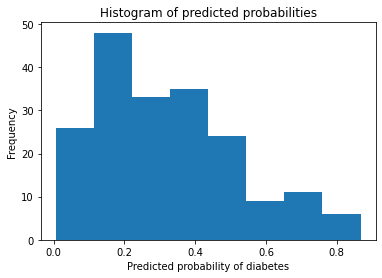

In [52]:
# histogram of predicted probabilities
plt.hist(y_pred_prob,bins=8)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

**Decrease the threshold** for predicting diabetes in order to **increase the sensitivity** of the classifier

In [63]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

/home/bhuvi/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [64]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [65]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [66]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[114  16]
 [ 46  16]]


In [67]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[82 48]
 [17 45]]


In [68]:
# sensitivity has increased (used to be 0.24)
print(46 / float(46 + 16))

0.7419354838709677


In [69]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


**Conclusion:**

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity
- Sensitivity and specificity have an **inverse relationship**

# ROC Curves and Area Under the Curve (AUC)

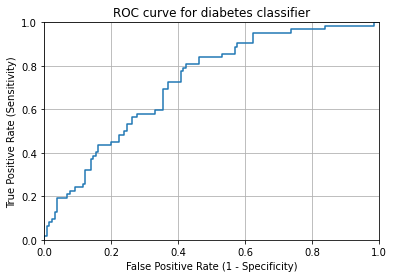

In [70]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [71]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [72]:
evaluate_threshold(0.5)

Sensitivity: 0.25806451612903225
Specificity: 0.8769230769230769


In [73]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6307692307692307


In [74]:
evaluate_threshold(0.2)

Sensitivity: 0.8548387096774194
Specificity: 0.46923076923076923


AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [76]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7227047146401985


In [77]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225